# 1. CLUSTER NO JERÁRQUICO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar los datos
df = pd.read_csv("NBA_BBDD_CLEAN.csv")

### Agrupamos a los jugadores por estilo de tiro

In [3]:
# Agrupar por jugador y calcular estadísticas relevantes

player_stats = df.groupby("PLAYER_NAME").agg({
    "SHOT_DISTANCE_METERS": "mean",  # Distancia promedio de los tiros
    "SHOT_TYPE": lambda x: (x == "3PT Field Goal").mean(),  # % de triples
    "SHOT_MADE_FLAG": "mean",  # % de acierto
    "SHOT_ZONE_BASIC": lambda x: x.mode()[0]  # Zona de tiro más frecuente
}).reset_index()

In [4]:
# Convertir zonas de tiro y tipo de tiro en variables numéricas (One-Hot Encoding)
player_stats = pd.get_dummies(player_stats, columns=["SHOT_ZONE_BASIC", "SHOT_TYPE"], drop_first=True)

In [5]:
# Normalizar los datos numéricos
scaler = StandardScaler()
features = ["SHOT_DISTANCE_METERS"] + list(player_stats.columns[4:])
player_stats_scaled = scaler.fit_transform(player_stats[features])

### Metodo del codo para determinar numero de clusters

In [6]:
inertia = []
K_range = range(1, 11)  # Probar con 1 a 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(player_stats_scaled)
    inertia.append(kmeans.inertia_)

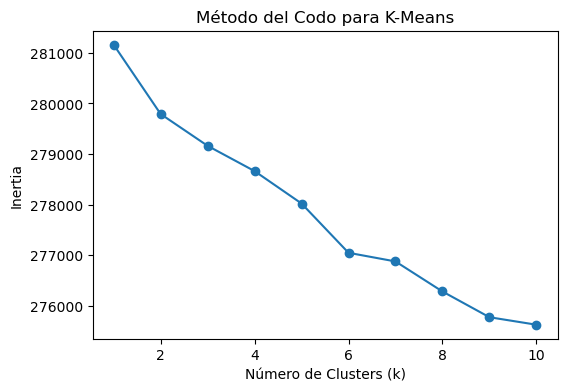

In [7]:
# Grafico del codo
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inertia")
plt.title("Método del Codo para K-Means")
plt.show()

### K-Means

In [8]:
# Aplico K-Means con 5 klusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
player_stats["Cluster"] = kmeans.fit_predict(player_stats_scaled)

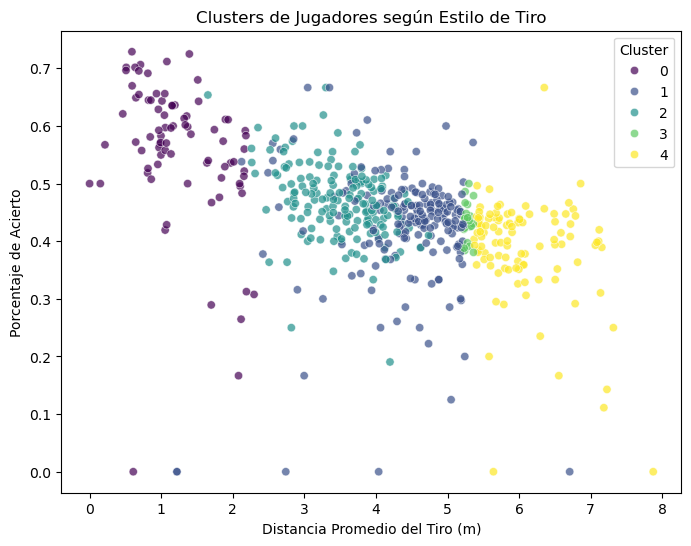

In [9]:
# Voy a graficar los clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=player_stats["SHOT_DISTANCE_METERS"], y=player_stats["SHOT_MADE_FLAG"], hue=player_stats["Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Distancia Promedio del Tiro (m)")
plt.ylabel("Porcentaje de Acierto")
plt.title("Clusters de Jugadores según Estilo de Tiro")
plt.show()

### Lista de jugadores agrupados por caracteristicas

In [11]:
# lista de jugadores perteneciente a cada cluster (agrupados pro caracteristicas de tiro similares)

# Agrupar por la columna "Cluster" y obtener los nombres únicos de los jugadores en cada cluster
cluster_players = player_stats.groupby("Cluster")["PLAYER_NAME"].unique()

# Mostrar la lista de jugadores únicos por cluster
for cluster, players in cluster_players.items():
    print(f"Cluster {cluster}: {', '.join(players)}")

Cluster 0: Aaron Gordon, Adama Sanogo, Alex Len, Amen Thompson, Andre Drummond, Ben Simmons, Bismack Biyombo, Boban Marjanovic, Bruno Fernando, Charles Bassey, Chris Livingston, Clint Capela, Cody Zeller, Colin Castleton, Daniel Gafford, Day'Ron Sharpe, DeAndre Jordan, Dereck Lively II, Dereon Seabron, Domantas Sabonis, Dominick Barlow, Drew Eubanks, Dwight Powell, Evan Mobley, Giannis Antetokounmpo, Goga Bitadze, Hamidou Diallo, Ibou Badji, Isaiah Hartenstein, Isaiah Jackson, Ivica Zubac, JaVale McGee, Jakob Poeltl, Jalen Duren, James Wiseman, Jarrett Allen, Jaxson Hayes, Jericho Sims, Jermaine Samuels Jr., Jusuf Nurkic, KJ Martin, Kendall Brown, Kevon Looney, Keyontae Johnson, Luke Kornet, Malik Williams, Mark Williams, Markelle Fultz, Marques Bolden, Marvin Bagley III, Mason Plumlee, Mitchell Robinson, Moritz Wagner, Moses Brown, Mouhamadou Gueye, Moussa Diabate, Nate Williams, Nathan Mensah, Neemias Queta, Nic Claxton, Nick Richards, Onyeka Okongwu, Oscar Tshiebwe, Paul Reed, Preci

### CLUSTERIZACIÓN USANDO SOLO COORDENADAS DE TIROS ACERTADOS

In [2]:
# Filtrar los datos para incluir solo los tiros que han entrado a canasta
df_made_shots = df[df['SHOT_MADE_FLAG'] == 1]

# Seleccionar solo las coordenadas de los tiros que han entrado
X = df_made_shots[['LOC_X', 'LOC_Y']]

# Realizar el clustering con KMeans (por ejemplo, 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Añadido n_init para evitar warnings
df_made_shots['Cluster'] = kmeans.fit_predict(X)

C:\Users\Sara\AppData\Local\Temp\ipykernel_7668\3343107358.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_made_shots['Cluster'] = kmeans.fit_predict(X)


### GRAFICO jugadores agupados por coordenadas de tiros acertados

C:\Users\Sara\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


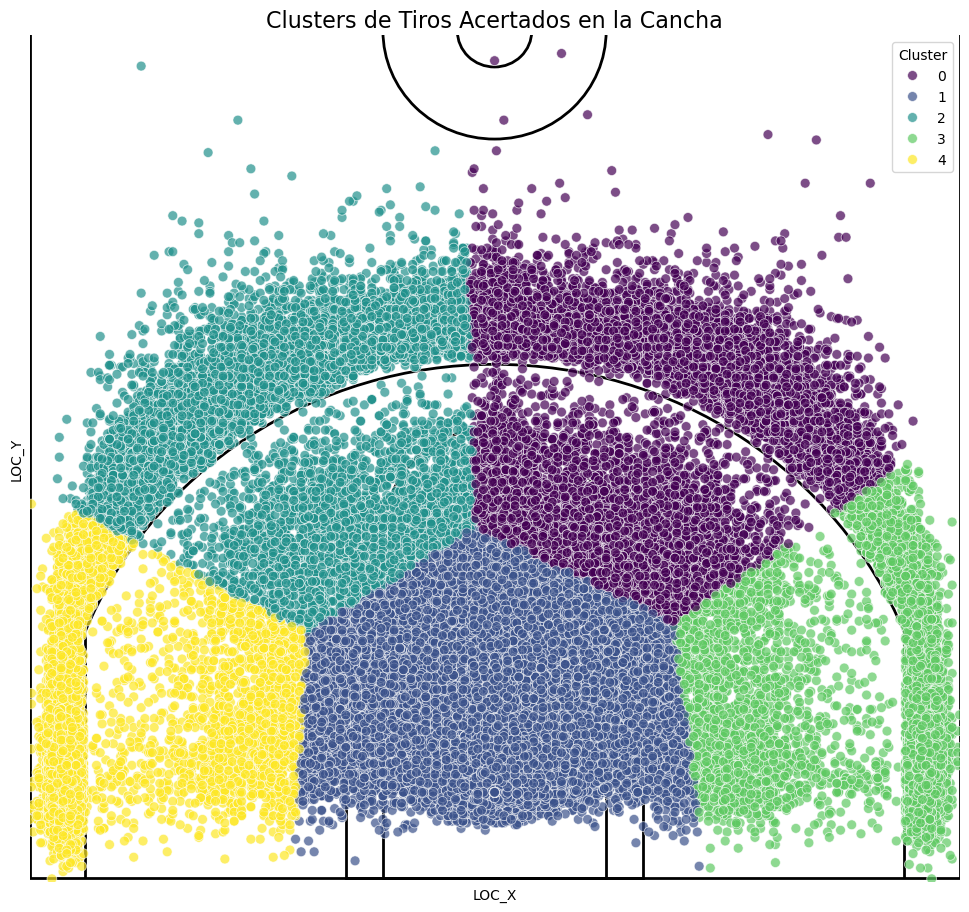

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Rectangle, Arc

# Función para dibujar la cancha (la que proporcionaste)
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()

    # Crear las partes de la cancha
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

    for element in court_elements:
        ax.add_patch(element)

    return ax

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 11))

# Dibujar la cancha
draw_court(ax, outer_lines=True)

# Graficar los tiros acertados, coloreados por cluster
sns.scatterplot(
    x=df_made_shots["LOC_X"],  # Coordenada X del tiro
    y=df_made_shots["LOC_Y"],  # Coordenada Y del tiro
    hue=df_made_shots["Cluster"],  # Colorear por cluster
    palette="viridis",  # Paleta de colores
    alpha=0.7,  # Transparencia de los puntos
    s=50,  # Tamaño de los puntos
    ax=ax  # Usar el eje de la cancha
)

# Ajustar los límites del gráfico
ax.set_xlim(-250, 250)
ax.set_ylim(-50, 420)

# Ocultar los ejes
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Añadir título
plt.title("Clusters de Tiros Acertados en la Cancha", fontsize=16)

# Mostrar la gráfica
plt.show()

### Lista de jugadores agrupados en base a los aciertos según la zona de tiro


In [18]:
# AHORA PONGO CADA JUGADOR EN UN SOLO CLUSTER SEGUN LA ZONA DESDE DONDE MÁS ACIERTA  --> VALORES ÚNICOS

# Paso 1: Agrupar por jugador y cluster, y contar los tiros encestados en cada cluster
cluster_counts = df_made_shots.groupby(['PLAYER_NAME', 'Cluster']).size().reset_index(name='SHOTS_MADE')

In [19]:
# Paso 2: Encontrar el cluster con más tiros encestados para cada jugador
player_max_cluster = cluster_counts.loc[cluster_counts.groupby('PLAYER_NAME')['SHOTS_MADE'].idxmax()]


In [23]:
# escalo coordenadas para que se vea mejor
from sklearn.preprocessing import StandardScaler

# Escalar las coordenadas
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(df_made_shots[['LOC_X', 'LOC_Y']])

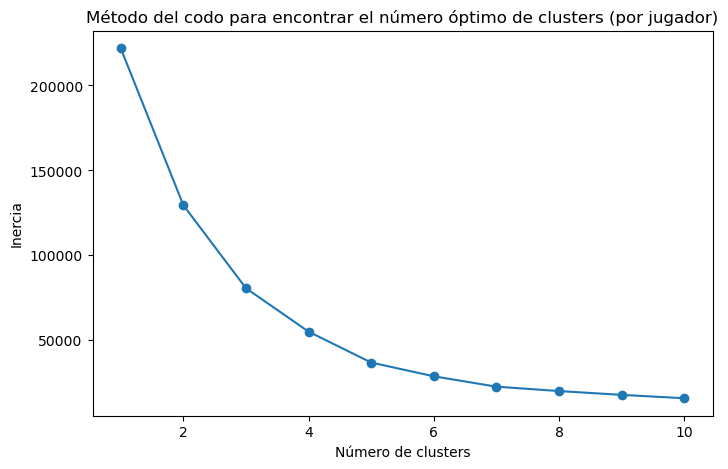

In [25]:
# Calcular la posición promedio de tiro para cada jugador
player_avg_coords = df_made_shots.groupby('PLAYER_NAME')[['LOC_X', 'LOC_Y']].mean().reset_index()

# Aplicar el método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(coords_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del codo para encontrar el número óptimo de clusters (por jugador)")
plt.show()

In [20]:
# Paso 3: Mostrar los jugadores únicos por cluster
for cluster in sorted(player_max_cluster['Cluster'].unique()):
    print(f"Cluster {cluster}:")
    players_in_cluster = player_max_cluster[player_max_cluster['Cluster'] == cluster]['PLAYER_NAME'].unique()
    print(players_in_cluster)
    print()

Cluster 0:
['AJ Green' 'Adam Flagler' 'Armoni Brooks' 'Buddy Boeheim' 'Cole Swider'
 'Daishen Nix' "Devonte' Graham" 'Dylan Windler' 'Emoni Bates'
 'Fred VanVleet' 'Garrison Mathews' 'Hunter Tyson' 'Isaiah Thomas'
 'Isaiah Wong' 'JD Davison' 'Jack White' 'Jacob Gilyard' 'Jalen Pickett'
 'Jevon Carter' 'Joe Ingles' 'Jordan Ford' 'Jordan Hawkins' 'Keon Johnson'
 'Klay Thompson' 'Luke Kennard' 'Markieff Morris' 'Mason Jones'
 'Nate Hinton' 'Otto Porter Jr.' 'Pete Nance' "Royce O'Neale" 'Sam Hauser'
 'Terquavion Smith' 'Tim Hardaway Jr.' 'Xavier Moon']

Cluster 1:
['AJ Lawson' 'Aaron Gordon' 'Aaron Holiday' 'Aaron Nesmith'
 'Aaron Wiggins' 'Adama Sanogo' 'Admiral Schofield' 'Al Horford'
 'Alec Burks' 'Aleksej Pokusevski' 'Alex Caruso' 'Alex Fudge' 'Alex Len'
 'Alondes Williams' 'Alperen Sengun' 'Amari Bailey' 'Amen Thompson'
 'Amir Coffey' 'Andre Drummond' 'Andre Jackson Jr.' 'Andrew Nembhard'
 'Andrew Wiggins' 'Anfernee Simons' 'Anthony Black' 'Anthony Davis'
 'Anthony Edwards' 'Anthony G

In [21]:
###

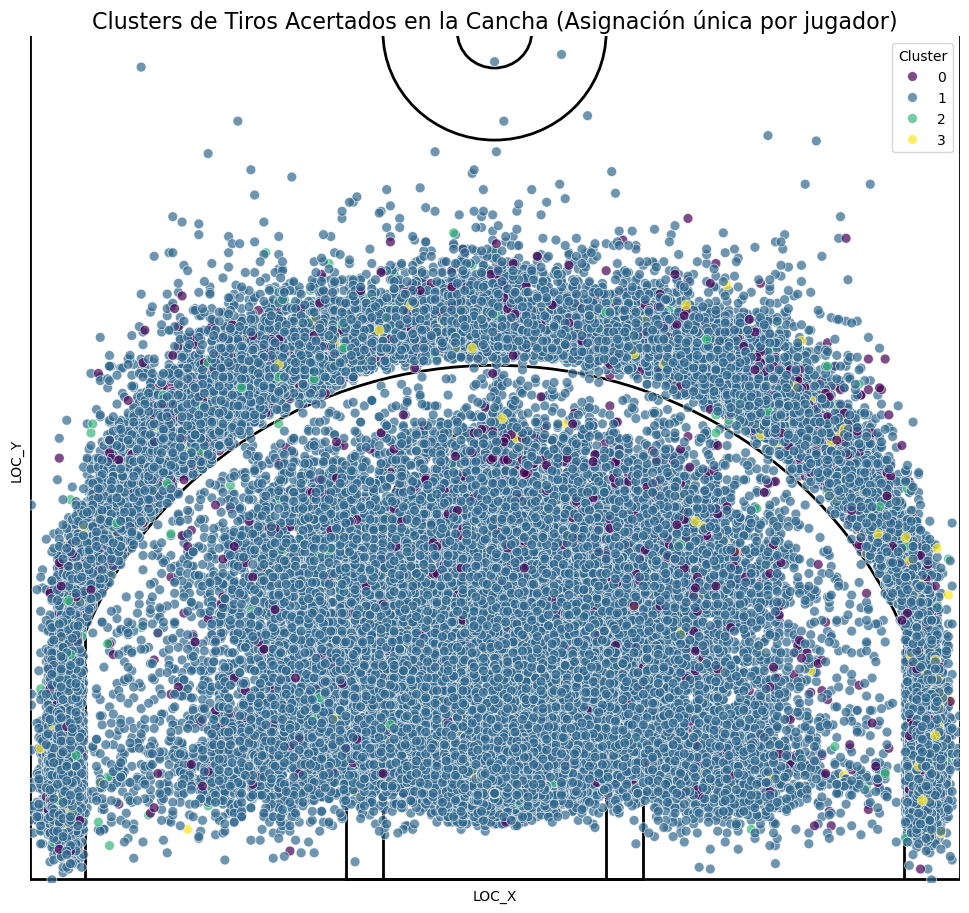

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Rectangle, Arc

# Función para dibujar la cancha (la que proporcionaste)
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()

    # Crear las partes de la cancha
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

    for element in court_elements:
        ax.add_patch(element)

    return ax

# Paso 1: Agrupar por jugador y cluster, y contar los tiros encestados en cada cluster
cluster_counts = df_made_shots.groupby(['PLAYER_NAME', 'Cluster']).size().reset_index(name='SHOTS_MADE')

# Paso 2: Encontrar el cluster con más tiros encestados para cada jugador
player_max_cluster = cluster_counts.loc[cluster_counts.groupby('PLAYER_NAME')['SHOTS_MADE'].idxmax()]

# Paso 3: Asignar el cluster a cada tiro en df_made_shots
df_made_shots = df_made_shots.merge(player_max_cluster[['PLAYER_NAME', 'Cluster']], on='PLAYER_NAME', how='left')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 11))

# Dibujar la cancha
draw_court(ax, outer_lines=True)

# Graficar los tiros acertados, coloreados por cluster asignado
sns.scatterplot(
    x=df_made_shots["LOC_X"],  # Coordenada X del tiro
    y=df_made_shots["LOC_Y"],  # Coordenada Y del tiro
    hue=df_made_shots["Cluster_y"],  # Colorear por cluster asignado
    palette="viridis",  # Paleta de colores
    alpha=0.7,  # Transparencia de los puntos
    s=50,  # Tamaño de los puntos
    ax=ax  # Usar el eje de la cancha
)

# Añadir leyenda en una ubicación fija
plt.legend(loc="upper right", title="Cluster")

# Ajustar los límites del gráfico
ax.set_xlim(-250, 250)
ax.set_ylim(-50, 420)

# Ocultar los ejes
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Añadir título
plt.title("Clusters de Tiros Acertados en la Cancha (Asignación única por jugador)", fontsize=16)

# Mostrar la gráfica
plt.show()

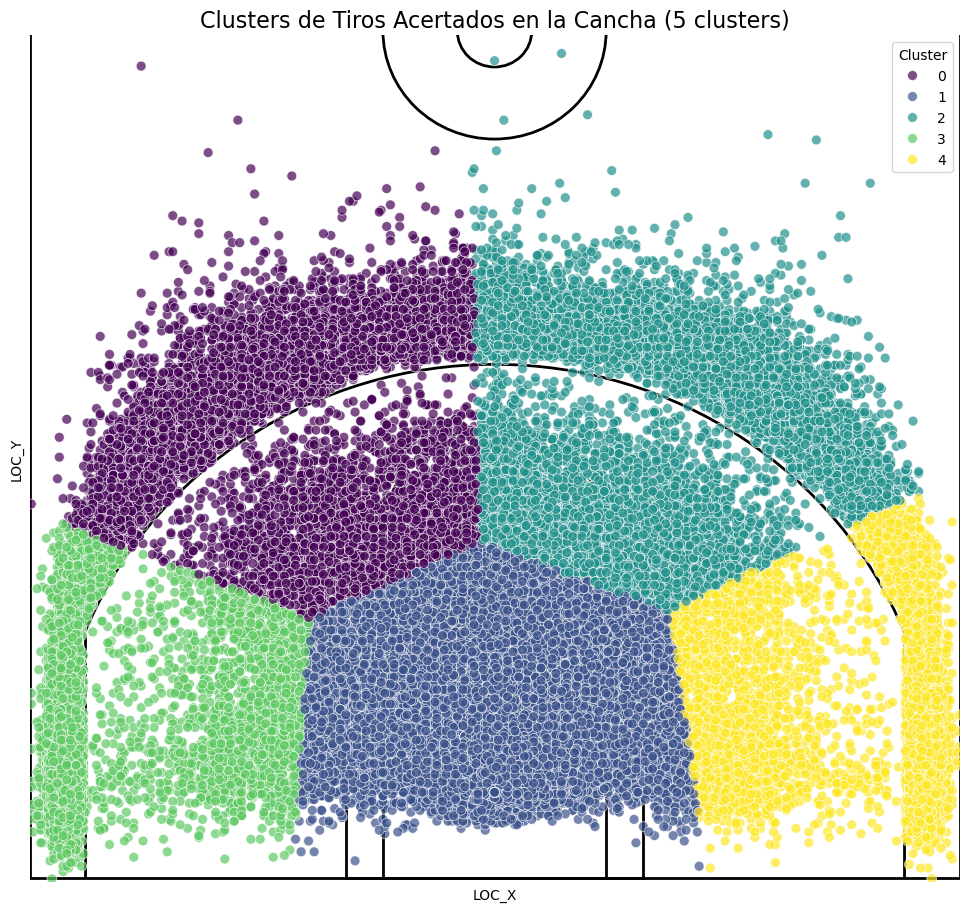

Cluster 0:
['AJ Griffin' 'Davis Bertans' 'Doug McDermott' 'D’Moi Hodge' 'Emoni Bates'
 'Isaiah Joe' 'Ish Wainright' 'Jack White' 'James Bouknight' 'Jett Howard'
 'Jordan Ford' 'Keon Ellis' 'Kevon Harris' 'Lindy Waters III'
 'Markieff Morris' 'Mason Jones' 'Matt Hurt' 'Sam Merrill']

Cluster 1:
['AJ Lawson' 'Aaron Gordon' 'Aaron Holiday' 'Aaron Nesmith'
 'Aaron Wiggins' 'Adama Sanogo' 'Admiral Schofield' 'Al Horford'
 'Alec Burks' 'Aleksej Pokusevski' 'Alex Caruso' 'Alex Fudge' 'Alex Len'
 'Alondes Williams' 'Alperen Sengun' 'Amari Bailey' 'Amen Thompson'
 'Amir Coffey' 'Andre Drummond' 'Andre Jackson Jr.' 'Andrew Nembhard'
 'Andrew Wiggins' 'Anfernee Simons' 'Anthony Black' 'Anthony Davis'
 'Anthony Edwards' 'Anthony Gill' 'Ashton Hagans' 'Ausar Thompson'
 'Austin Reaves' 'Ayo Dosunmu' 'Bam Adebayo' 'Ben Sheppard' 'Ben Simmons'
 'Bennedict Mathurin' 'Bilal Coulibaly' 'Bismack Biyombo' 'Blake Wesley'
 'Boban Marjanovic' 'Bobby Portis' 'Bogdan Bogdanovic' 'Bojan Bogdanovic'
 'Bol Bol' 'B

In [26]:
# Paso 1: Aplicar KMeans con 5 clusters
n_clusters = 5  # Número ideal de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_made_shots['Cluster'] = kmeans.fit_predict(coords_scaled)

# Paso 2: Asignar cada jugador al cluster donde más ha encestado
cluster_counts = df_made_shots.groupby(['PLAYER_NAME', 'Cluster']).size().reset_index(name='SHOTS_MADE')
player_max_cluster = cluster_counts.loc[cluster_counts.groupby('PLAYER_NAME')['SHOTS_MADE'].idxmax()]

# Paso 3: Graficar los clusters en la cancha
fig, ax = plt.subplots(figsize=(12, 11))

# Dibujar la cancha
draw_court(ax, outer_lines=True)

# Graficar los tiros acertados, coloreados por cluster
sns.scatterplot(
    x=df_made_shots["LOC_X"],  # Coordenada X del tiro
    y=df_made_shots["LOC_Y"],  # Coordenada Y del tiro
    hue=df_made_shots["Cluster"],  # Colorear por cluster
    palette="viridis",  # Paleta de colores
    alpha=0.7,  # Transparencia de los puntos
    s=50,  # Tamaño de los puntos
    ax=ax  # Usar el eje de la cancha
)

# Añadir leyenda en una ubicación fija
plt.legend(loc="upper right", title="Cluster")

# Ajustar los límites del gráfico
ax.set_xlim(-250, 250)
ax.set_ylim(-50, 420)

# Ocultar los ejes
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Añadir título
plt.title(f"Clusters de Tiros Acertados en la Cancha ({n_clusters} clusters)", fontsize=16)

# Mostrar la gráfica
plt.show()

# Paso 5: Mostrar los jugadores únicos por cluster
for cluster in sorted(player_max_cluster['Cluster'].unique()):
    print(f"Cluster {cluster}:")
    players_in_cluster = player_max_cluster[player_max_cluster['Cluster'] == cluster]['PLAYER_NAME'].unique()
    print(players_in_cluster)
    print()

### Subclusterización del grupo 1 que es el más numeroso

In [28]:
cluster_1_df = df_made_shots[df_made_shots['Cluster'] == 1]

In [30]:

# Número de sub-clusters que queremos crear dentro del cluster 1
n_sub_clusters = 5

# Realizar KMeans para el cluster 1
kmeans_sub = KMeans(n_clusters=n_sub_clusters, random_state=42)
cluster_1_df['Sub_Cluster'] = kmeans_sub.fit_predict(cluster_1_df[['LOC_X', 'LOC_Y']])

C:\Users\Sara\AppData\Local\Temp\ipykernel_10008\4188565821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_df['Sub_Cluster'] = kmeans_sub.fit_predict(cluster_1_df[['LOC_X', 'LOC_Y']])


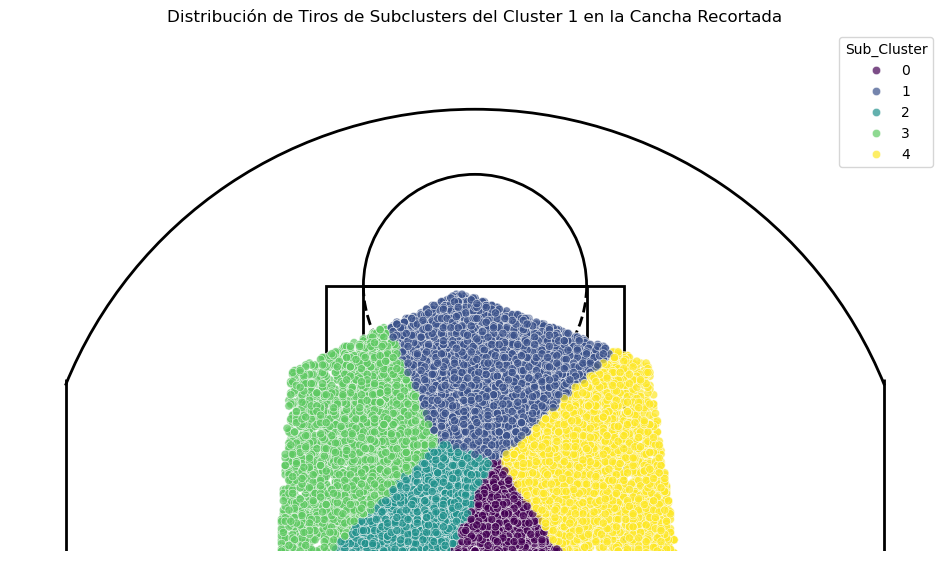

In [34]:
# Función para dibujar la cancha
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()

    # Crear los elementos de la cancha
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw, restricted,
                      corner_three_a, corner_three_b, three_arc, center_outer_arc, center_inner_arc]

    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

    for element in court_elements:
        ax.add_patch(element)

    return ax

# Gráfico con los subclusters de la zona del cluster 1 recortada
fig, ax = plt.subplots(figsize=(12, 11))

# Dibujar la cancha
draw_court(ax)

# Ajustar los límites del gráfico sin distorsionar
ax.set_xlim(-250, 250)  # Mantener el mismo ancho de la cancha
ax.set_ylim(0, 280)     # Ajustar el límite superior para que corte el gráfico a 2/3 de la altura

# Ajustar la relación de aspecto para que la cancha no se distorsione
ax.set_aspect('equal', adjustable='box')

# Ocultar los ejes
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Graficar los puntos del subcluster sobre la cancha
sns.scatterplot(x=cluster_1_df["LOC_X"], y=cluster_1_df["LOC_Y"], hue=cluster_1_df["Sub_Cluster"],
                palette="viridis", alpha=0.7, ax=ax, legend='full')

# Título y etiquetas
plt.title("Distribución de Tiros de Subclusters del Cluster 1 en la Cancha Recortada")
plt.show()

In [35]:
# VER EL LISTADO DE CADA CLUSTER CON SU JUGADOR
for cluster in sorted(player_max_cluster['Cluster'].unique()):
    print(f"Cluster {cluster}:")
    players_in_cluster = player_max_cluster[player_max_cluster['Cluster'] == cluster]['PLAYER_NAME'].unique()
    print(players_in_cluster)
    print()

Cluster 0:
['AJ Griffin' 'Davis Bertans' 'Doug McDermott' 'D’Moi Hodge' 'Emoni Bates'
 'Isaiah Joe' 'Ish Wainright' 'Jack White' 'James Bouknight' 'Jett Howard'
 'Jordan Ford' 'Keon Ellis' 'Kevon Harris' 'Lindy Waters III'
 'Markieff Morris' 'Mason Jones' 'Matt Hurt' 'Sam Merrill']

Cluster 1:
['AJ Lawson' 'Aaron Gordon' 'Aaron Holiday' 'Aaron Nesmith'
 'Aaron Wiggins' 'Adama Sanogo' 'Admiral Schofield' 'Al Horford'
 'Alec Burks' 'Aleksej Pokusevski' 'Alex Caruso' 'Alex Fudge' 'Alex Len'
 'Alondes Williams' 'Alperen Sengun' 'Amari Bailey' 'Amen Thompson'
 'Amir Coffey' 'Andre Drummond' 'Andre Jackson Jr.' 'Andrew Nembhard'
 'Andrew Wiggins' 'Anfernee Simons' 'Anthony Black' 'Anthony Davis'
 'Anthony Edwards' 'Anthony Gill' 'Ashton Hagans' 'Ausar Thompson'
 'Austin Reaves' 'Ayo Dosunmu' 'Bam Adebayo' 'Ben Sheppard' 'Ben Simmons'
 'Bennedict Mathurin' 'Bilal Coulibaly' 'Bismack Biyombo' 'Blake Wesley'
 'Boban Marjanovic' 'Bobby Portis' 'Bogdan Bogdanovic' 'Bojan Bogdanovic'
 'Bol Bol' 'B

# 2. REGRESIÓN LOGISTICA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('NBA_STATS.csv')df = pd.read_csv('NBA_STATS.csv')

### Modificación pre-dummies

In [4]:
# Creo distancia de tiro, angulo de tiro y tiempo restante

In [ ]:
# Calcular la distancia al aro
df['DIST_TO_HOOP'] = np.sqrt(df['LOC_X']**2 + df['LOC_Y']**2)

# Calcular el ángulo del tiro en grados
df['SHOT_ANGLE'] = np.arctan2(df['LOC_Y'], df['LOC_X']) * (180 / np.pi)

# Calcular el tiempo total restante en segundos
df['TIME_REMAINING'] = (df['MINUTES_REMAINING'] * 60) + df['SECONDS_REMAINING']

In [ ]:
# ahora puedo eliminar otras columnas
df = df.drop(['MINUTES_REMAINING','SECONDS_REMAINING',
       'LOC_X','LOC_Y'], axis=1)

In [ ]:
# Normalizo variables numéricas
from sklearn.preprocessing import StandardScaler

# Lista de columnas a normalizar
columns_to_normalize = [
    'SHOT_DISTANCE_METERS',
    'DIST_TO_HOOP', 'SHOT_ANGLE', 'TIME_REMAINING', 'FG%', '3P%', '2P%', 'eFG%'
]

# Aplicar StandardScaler
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [ ]:
# Verificar si hay valores NaN en SHOT_MADE_FLAG
print("Valores NaN en SHOT_MADE_FLAG:", df['SHOT_MADE_FLAG'].isnull().sum())

In [ ]:
df = df.dropna(subset=['SHOT_MADE_FLAG'])

In [ ]:
# Dummies

# Aplicar one-hot encoding a las columnas categóricas
df = pd.get_dummies(df, columns=['SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA'], drop_first=True)

# Mostrar las primeras filas del DataFrame con las nuevas columnas dummy
print(df.head())

### Defino x e y

In [ ]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['SHOT_MADE_FLAG'])  # Todas las columnas excepto la variable objetivo
y = df['SHOT_MADE_FLAG']  # Variable objetivo


### Divido en Test y Train

In [ ]:

# Dividir los datos en entrenamiento (75%) y prueba (25%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.75,
    test_size = 0.25,
    random_state=42
)



### Analisis predictivo

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 10000)
selector = RFE(
    lr,
    n_features_to_select = 18
)
selector.fit(X_train, y_train)

In [ ]:
X_train_final = X_train.loc[:, selector.support_]
X_test_final = X_test.loc[:, selector.support_]

### Creo modelo

In [ ]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train_final, y_train)

### Valido el modelo

In [ ]:
y_pred = logreg.predict(X_test_final)
y_pred_proba = logreg.predict_proba(X_test_final)[:,1]

In [ ]:
pd.DataFrame({
    "y_real": y_test,
    "y_pred": y_pred
}).groupby(["y_real", "y_pred"]).size().reset_index()

### Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

In [ ]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

### Evaluo el modelo

In [ ]:
# Accuracy
(TN+TP) / (TN+TP+FN+FP)

In [ ]:
# Sensibilidad
TP / (TP + FN)

In [ ]:
# Especificidad
TN / (TN + FP)

In [ ]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
# CURVA DE ROC

especificidad_inv, sensibilidad, umbral = roc_curve(y_test, y_pred_proba)
roc_auc_score(y_test, y_pred_proba)

recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, ls = "--", c = "r")

# 3. RANDOM FOREST

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_csv("NBA_BBDD_CLEAN.csv")

In [ ]:
# voy a fragmentar el tiempo: separo un minuto o menos del ultimo cuarto y todo lo demás
df["LAST_MINUTE"] = df.apply(lambda row: 1 if row["PERIOD"] == 4 and row["MINUTES_REMAINING"] <= 1 else 0, axis=1)

In [ ]:
df = df.drop(columns=['GAME_ID','EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE', 'SHOT_ZONE_RANGE_METERS','SHOT_ATTEMPTED_FLAG','PLAYER_NAME', 'LOC_X', 'LOC_Y','SHOT_ZONE_BASIC','SHOT_ZONE_AREA','TEAM_NAME', 'AWAY_TEAM_NAME', 'HOME_TEAM_NAME', 'GAME_DATE'])


In [ ]:
# Calcular el número total de tiros y tiros anotados por jugador
player_stats = df.groupby('PLAYER_ID').agg(
    TOTAL_SHOTS=('SHOT_MADE_FLAG', 'size'),  # Número total de tiros (filas por jugador)
    SHOTS_MADE=('SHOT_MADE_FLAG', 'sum')     # Número de tiros anotados
)

# Calcular el porcentaje de aciertos
player_stats['SHOT_ACCURACY'] = player_stats['SHOTS_MADE'] / player_stats['TOTAL_SHOTS']

# Verificar el resultado
print(player_stats.head())

In [ ]:
df = df.merge(player_stats[['SHOT_ACCURACY']], on='PLAYER_ID', how='left')

# Verificar el resultado
print(df[['PLAYER_ID', 'SHOT_MADE_FLAG', 'SHOT_ACCURACY']].head())

In [ ]:
# Eliminar columnas
df = df.drop(columns=['GAME_ID','ACTION_TYPE', 'EVENT_TYPE','SHOT_TYPE', 'SHOT_ZONE_RANGE_METERS','SHOT_ATTEMPTED_FLAG', 'PLAYER_NAME', 'LOC_X', 'LOC_Y','SHOT_ZONE_BASIC','SHOT_ZONE_AREA','TEAM_NAME', 'AWAY_TEAM_NAME', 'HOME_TEAM_NAME', 'GAME_DATE'])


In [ ]:
# dummies
df = pd.get_dummies(df, columns=[
     'SEASON TYPE', 'LOCATION', 'POS',
], drop_first=True)


In [ ]:
# divido en test y train
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != "SHOT_MADE_FLAG"]
y = df.loc[:, "SHOT_MADE_FLAG"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.75,
    test_size = 0.25
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo con class_weight='balanced'
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,  # Aumentar la profundidad
    min_samples_split=10,  # Reducir el mínimo de muestras para dividir
    min_samples_leaf=5,  # Reducir el mínimo de muestras en una hoja
    class_weight='balanced',  # Balancear las clases
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

In [ ]:
# evaluo modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Hacer predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClasification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 4. REDES NEURONALES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('NBA_STATS.csv')

In [ ]:
#  eliminar columnas de mi df

df = df.drop(['GAME_ID','EVENT_TYPE', 'NEW_GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'HOME_TEAM_NAME',
       'AWAY_TEAM_NAME', 'LOCATION', 'POS',
       'TEAM_NAME','Rk','SHOT_ATTEMPTED_FLAG', 'ACTION_TYPE', 'SHOT_ZONE_RANGE_METERS', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'GAME_ID', 'NEW_GAME_EVENT_ID','GAME_DATE', 'SEASON TYPE', 'HOME_TEAM_NAME', 'AWAY_TEAM_NAME', 'LOCATION','ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF'  ], axis=1)


In [ ]:
# Calcular la distancia al aro
df['DIST_TO_HOOP'] = np.sqrt(df['LOC_X']**2 + df['LOC_Y']**2)

# Calcular el ángulo del tiro en grados
df['SHOT_ANGLE'] = np.arctan2(df['LOC_Y'], df['LOC_X']) * (180 / np.pi)

# Calcular el tiempo total restante en segundos
df['TIME_REMAINING'] = (df['MINUTES_REMAINING'] * 60) + df['SECONDS_REMAINING']

In [ ]:
# ahora puedo eliminar otras columnas
df = df.drop(['MINUTES_REMAINING','SECONDS_REMAINING',
       'LOC_X','LOC_Y'], axis=1)

In [ ]:
# Normalizo variables numericas

from sklearn.preprocessing import StandardScaler

# Lista de columnas a normalizar
columns_to_normalize = [
    'SHOT_DISTANCE_METERS',
    'DIST_TO_HOOP', 'SHOT_ANGLE', 'TIME_REMAINING', 'FG%', '3P%', '2P%', 'eFG%'
]

# Aplicar StandardScaler
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [ ]:
# Verificar si hay valores NaN en SHOT_MADE_FLAG
print("Valores NaN en SHOT_MADE_FLAG:", df['SHOT_MADE_FLAG'].isnull().sum())

In [ ]:
# DUMMIES
df = pd.get_dummies(df, columns=['SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA'], drop_first=True)


In [ ]:
# Divido en test y train

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Defino caracteristicas (X) y la variable  (y)
X = df.drop(columns=['SHOT_MADE_FLAG'])  # Todas las columnas excepto la variable objetivo
y = df['SHOT_MADE_FLAG']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.75,
    test_size = 0.25,
    random_state=42
)


In [ ]:
# Creo la red

from keras.models import Sequential
from tensorflow.keras import Input
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
# Inicializo red neuronal
model = Sequential()

In [ ]:
# Creo capa de entrada y primera capa oculta

model.add(Dense(units=128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))

In [ ]:
# Segunda capa oculta
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

In [ ]:
# Tercera capa oculta
model.add(Dense(units=32, activation='relu'))

In [ ]:
# Capa de salida (sigmoid)
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compilamos el modelo, definiendo la función de coste y el optimizador.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    loss='binary_crossentropy',  # Función de pérdida para clasificación binaria
    optimizer=Adam(learning_rate=0.001),   # Optimizador Adam con tasa de aprendizaje 0.001
    metrics=['acc']  # Monitorear la exactitud durante el entrenamiento
)

# Early stopping para detener entrenamiento si no mejora
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Entreno modelo


history = model.fit(
    X_train,  # Datos de entrenamiento
    y_train,  # Etiquetas de entrenamiento
    epochs=50,  # Número de épocas
    batch_size=32, # Tamaño del lote
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

In [ ]:
# Evaluo el modelo con el conjunto de prueba

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy en test: {test_acc:.2%}')

# REGRESION LINEAL MULTIPLE

In [ ]:
import pandas as pd

df = pd.read_csv('2023-2024 NBA Player Stats - Regular.csv', encoding='latin1', sep=';')

df.head()

In [ ]:
# Verificar valores nulos
print(df.isnull().sum())


In [ ]:
# Crear columna Puntos por minutos
df['PTS_per_MP'] = df['PTS'] / df['MP']

In [ ]:
# elimino columna nombre y más categoricas para calcular la matriz de correlación
df = df.drop(columns=[ 'Player','Pos', 'Tm'])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la correlación de PTS con las demás columnas
pts_correlation = df.corr()['PTS'].sort_values(ascending=False)

# Mostrar la correlación
print(pts_correlation)

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})
plt.title('Matriz de correlación')
plt.show()

In [ ]:
# Seleccionar las variables relevantes
selected_features = [
    'MP', 'AST', 'DRB', '3P', 'TRB', 'STL', 'PF', 'GS', 'G', 'PTS_per_MP', 'FT%'
]

# Crear un nuevo DataFrame con las variables seleccionadas
df_new = df[selected_features + ['PTS']]  # Incluimos 'PTS' como variable objetivo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definir X e y
X = df_new.drop(columns=['PTS'])
y = df_new['PTS']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Predecir y evaluar
y_pred = model.predict(X_test)
print('Error cuadrático medio:', mean_squared_error(y_test, y_pred))
print('Coeficiente de determinación (R²):', r2_score(y_test, y_pred))

In [ ]:
# El overfitting ocurre cuando el modelo tiene un rendimiento mucho mejor en los datos de entrenamiento 
# que en los datos de prueba. Para verificarlo:


# Predecir en los datos de entrenamiento
y_train_pred = model.predict(X_train)

# Calcular métricas en entrenamiento
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Comparar con las métricas en prueba
print('Entrenamiento - Error cuadrático medio:', train_mse)
print('Entrenamiento - Coeficiente de determinación (R²):', train_r2)
print('Prueba - Error cuadrático medio:', mean_squared_error(y_test, y_pred))
print('Prueba - Coeficiente de determinación (R²):', r2_score(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea diagonal
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs predichos')
plt.show()